<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
print(df.columns.values)
print(df.info())
print(df.describe())
print(df.dtypes)

['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
## Write your code here
missing_values = df.isnull().sum()
print("Valeurs manquantes avant nettoyage:", missing_values)

df.dropna(subset=['ConvertedCompYearly'], inplace=True)

# 3. Remplacer les valeurs manquantes de 'WorkExp' par la médiane
df['WorkExp'].fillna(df['WorkExp'].median(), inplace=True)

# Vérification rapide
print("\nValeurs manquantes restantes :")
print(df[['ConvertedCompYearly', 'WorkExp']].isnull().sum())

Valeurs manquantes avant nettoyage: ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork                8
                       ... 
JobSatPoints_11        7250
SurveyLength            277
SurveyEase              251
ConvertedCompYearly       0
JobSat                 7360
Length: 114, dtype: int64

Valeurs manquantes restantes :
ConvertedCompYearly    0
WorkExp                0
dtype: int64


/tmp/ipykernel_4356/3124297826.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkExp'].fillna(df['WorkExp'].median(), inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
# Afficher les comptes de valeurs pour 'Employment'
print("Distribution Employment :")
print(df['Employment'].value_counts())
print("-" * 30)

# Afficher les comptes de valeurs pour 'JobSat'
print("Distribution JobSat :")
print(df['JobSat'].value_counts())
print("-" * 30)

# Afficher les comptes de valeurs pour 'YearsCodePro'
print("Distribution YearsCodePro :")
print(df['YearsCodePro'].value_counts())

Distribution Employment :
Employment
Employed, full-time                                                                                                                                                                                                     17586
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 1692
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1624
Employed, part-time                                                                                                                                                                                                       432
Employed, full-time;Student, part-time                                     

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


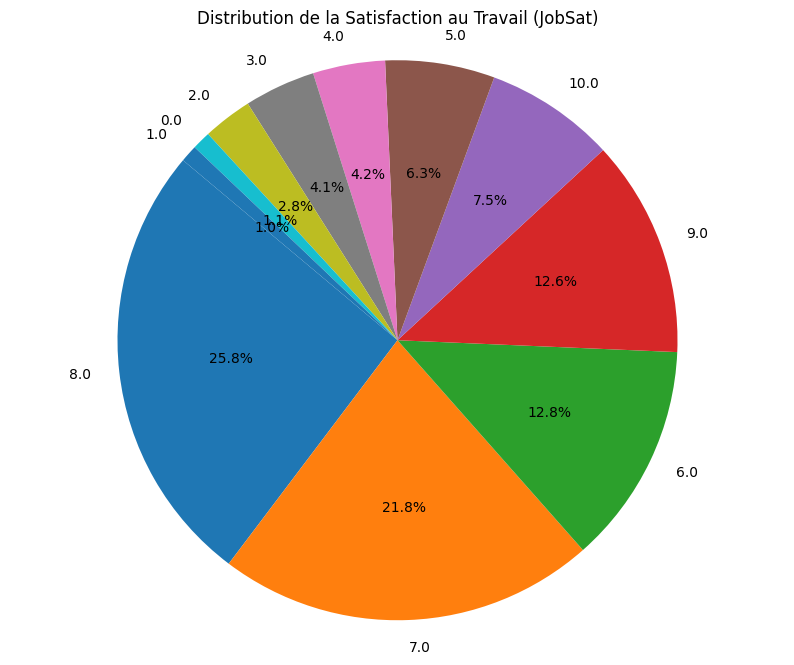

In [10]:
## Write your code here
data = {
    8.0: 4150, 7.0: 3507, 6.0: 2058, 9.0: 2018, 10.0: 1207,
    5.0: 1016, 4.0: 670, 3.0: 660, 2.0: 458, 0.0: 172, 1.0: 159
}

labels = [str(k) for k in data.keys()]
sizes = list(data.values())

# Création du Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution de la Satisfaction au Travail (JobSat)')
plt.axis('equal')

plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


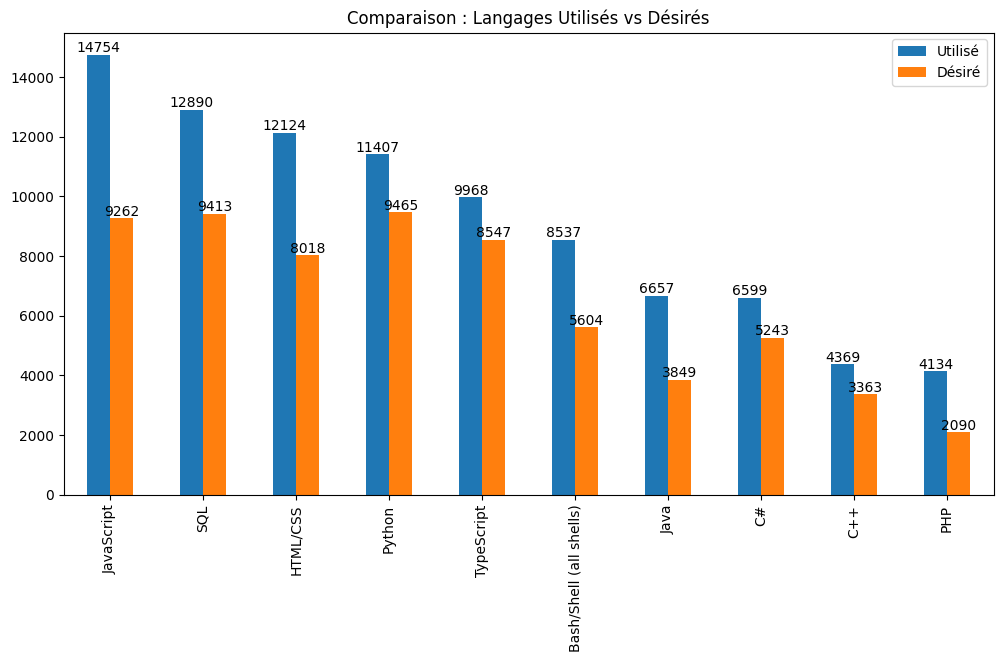

In [12]:
# 1. Préparer les données (comme avant)
worked = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
wanted = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

top_10 = worked.head(10).index
data_plot = pd.DataFrame({'Utilisé': worked[top_10], 'Désiré': wanted[top_10]})

# 2. Créer le graphique en le stockant dans une variable 'ax'
ax = data_plot.plot(kind='bar', figsize=(12, 6))

# 3. Ajouter les chiffres au-dessus des barres
for container in ax.containers:
    ax.bar_label(container)

plt.title('Comparaison : Langages Utilisés vs Désirés')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


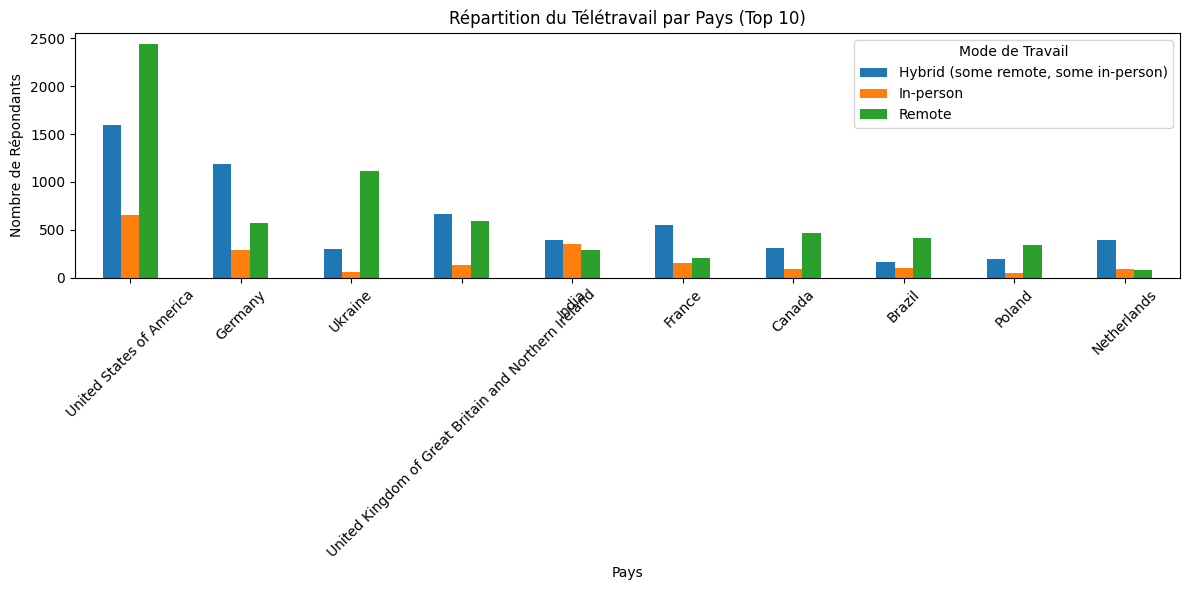

In [13]:
## Write your code here
top_10countries = df['Country'].value_counts().head(10).index
df_filtered = df[df['Country'].isin(top_10countries)]

# 3. Créer un tableau croisé (Crosstab) : Pays vs Télétravail
# Cela compte automatiquement qui fait quoi dans chaque pays
cross_tab = pd.crosstab(df_filtered['Country'], df_filtered['RemoteWork'])

# On réordonne les lignes pour avoir les plus gros pays en premier
cross_tab = cross_tab.loc[top_10countries]

# 4. Afficher le graphique à barres groupées
cross_tab.plot(kind='bar', figsize=(12, 6))

plt.title('Répartition du Télétravail par Pays (Top 10)')
plt.ylabel('Nombre de Répondants')
plt.xlabel('Pays')
plt.xticks(rotation=45)
plt.legend(title='Mode de Travail')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [15]:
correlation = df['JobSat'].corr(df['YearsCodePro'])
print(f"Corrélation de Pearson : {correlation:.4f}")

Corrélation de Pearson : 0.1030


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


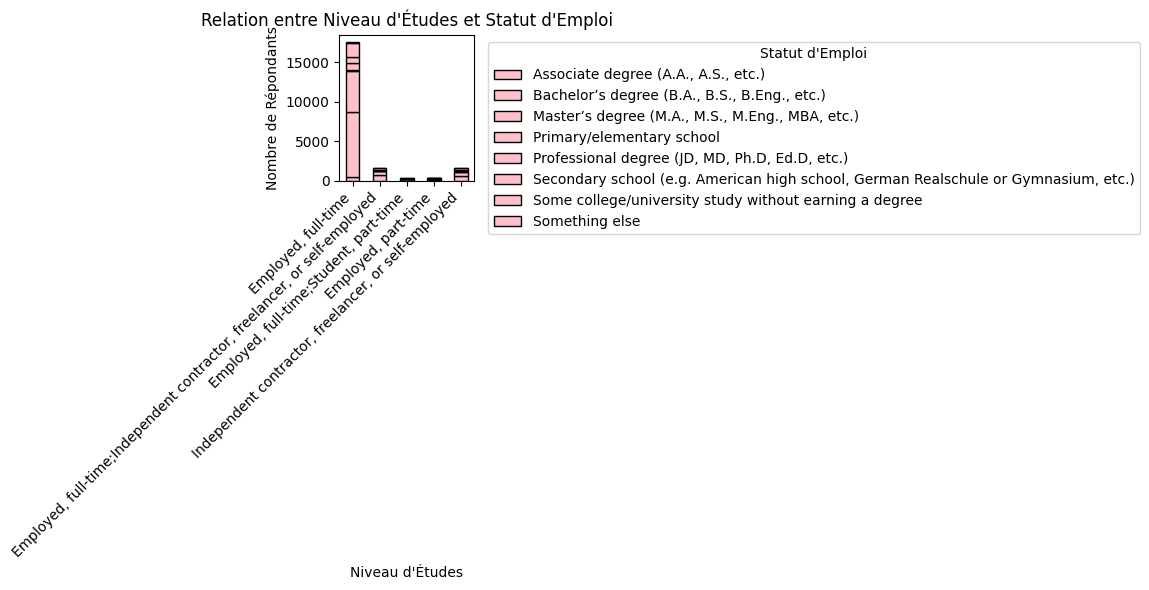

In [16]:
## Write your code here
top_emp = df['Employment'].value_counts().head().index
df_filtered = df[df['Employment'].isin(top_emp)]

cross_tab = pd.crosstab(df_filtered['Employment'], df_filtered['EdLevel'])

cross_tab.plot(kind='bar', stacked=True, color='pink', figsize=(10, 6), edgecolor='black')
plt.xlabel('Niveau d\'Études')
plt.ylabel('Nombre de Répondants')
plt.title('Relation entre Niveau d\'Études et Statut d\'Emploi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statut d\'Emploi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('data_distributed.csv', index=False)
print("Le fichier'data_distributed.csv' a été enregistré avec succès !")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
